<a href="https://colab.research.google.com/github/jadepanths/Python-PyTorch-Tutorial/blob/main/Optimizing_Model_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTIMIZING MODEL PARAMETERS
Since we got a model and data from the previous sessions, we will train, validate, and test our model by optimizing its parameters on our data. Training a model is an iterative process. In each iteration (called an epoch), the model makes a guess about output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters, and optimizes these parameters using gradient descent.

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Hyperparameters
Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:

1.   **Number of Epochs** - the number times to iterate over the dataset
2.   **Batch Size** - the number of data samples propagated through the network before the parameters are updated
3.   **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training


In [6]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop
Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:

1.   **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
2.   **The Validation/Test Loop** - iterate over the test dataset to check if the model performance is improving.


## Loss Function
When presented with some training data, our untrained network is likely not to give the correct answer. **Loss function** measures the dissimilarity of the obtained result to the target result to the target value, and it is the loss fucntion that we want to minimize during the training. In conclusion, **loss** is a prediction error of the neural network. 

### [Loss](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718)
To calculate the loss, we make a prediction using the inputs of the given data sample and compare it against the true data label value. 

There are various inbuilt loss functions for different objectives. The essential loss functions are:

*   Mean Squared Error(MSE)
*   Negative Log Likelihood(NLL)
*   Binary Crossentropy (BCE)
*   Categorical Crossentropy (CC)
*   Sparse Categorical Crossentropy (SCC)

We pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.

In [3]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

#### Mean Squared Error
**MSE** ([nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)) loss is used for regression tasks. 
To calculate, we simply taking the mean of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and the actual values.

Here is an example from [Towards data science](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718), we have a neural network wich takes house data and predicts house price. In this case, you can use the **MSE** loss. Basically, in the case where the output is a real number, you should use this loss function.
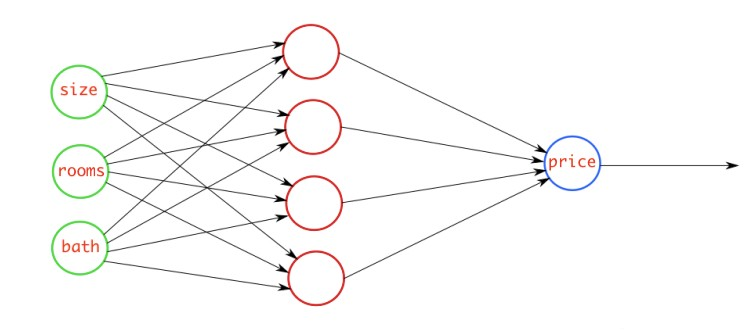

#### Negaive Log Likelihood
The negative log likelihood loss ([nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)). It is useful to train a classification problem with C classes.

#### Crossentropy
Crossentropy loss in pyTorch combines ```LogSoftmax``` and ```NLLLoss``` in an one single class.
It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

In [4]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
print(output)

tensor(1.9896, grad_fn=<NllLossBackward>)


##### Binary Crossentropy
According to *Towards data science*,
BCE loss is used for the binary classification tasks. If you are using BCE loss function, you just need one output node to classify the data into two classes. The output value should be passed through a sigmoid activation function and the range of output is (0 – 1).

For example, we have a neural network that takes atmosphere data and predicts whether it will rain or not. If the output is greater than 0.5, the network classifies it as `rain` and if the output is less than 0.5, the network classifies it as `not rain`. (it could be opposite depending upon how you train the network). More the probability score value, the more the chance of raining.
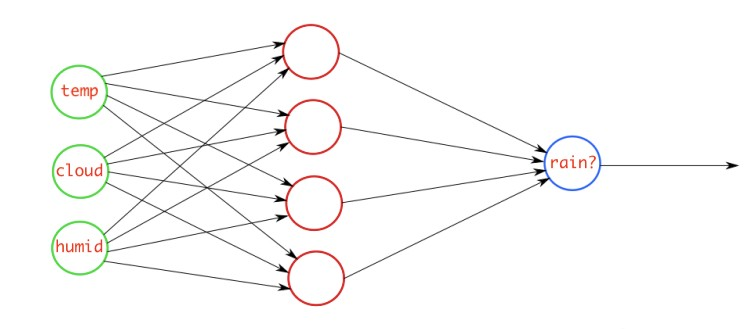

##### Categorical Crossentropy
According to [Towards data science](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718),
when we have a multi-class classification task, one of the loss function you can go ahead is this one. If you are using CCE loss function, there must be the same number of output nodes as the classes. And the final layer output should be passed through a softmax activation so that each node output a probability value between (0 – 1).

For example, we have a neural network that takes an image and classifies it into a cat or dog. If the cat node has a high probability score then the image is classified into a cat otherwise dog. Basically, whichever class node has the highest probability score, the image is classified into that class.
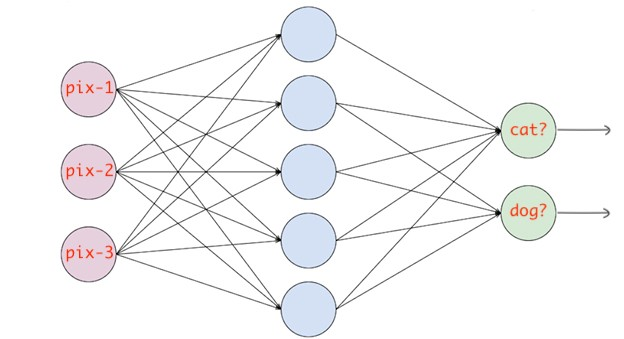

##### Sparse Categorical Crossentropy
According to *Towards data science*, this loss function is almost similar to CCE except for one change.
When we are using SCCE loss function, you do not need to one hot encode the target vector. If the target image is of a cat, you simply pass 0, otherwise 1. Basically, whichever the class is you just pass the index of that class.

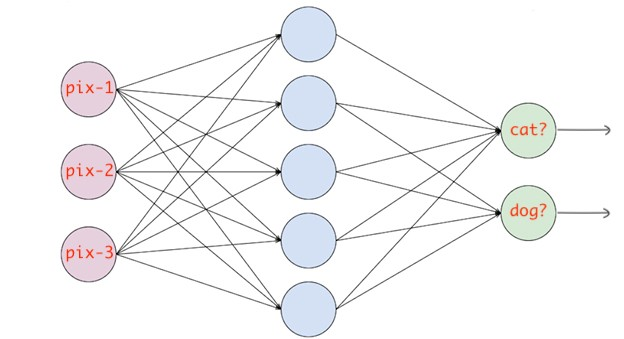

## Optimizer
Optimization is the process of adjusting model parameters to reduce model error in each training step.
Optimization algorithms define how this process is performed (in this example, we use Stochastic Gradient Descent). All optimization logic is ancapsulated in the optimizer object. Here, we use the SGD optimizerl additionally, there are many [optimizers](https://pytorch.org/docs/stable/optim.html) available in PyTorch.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, opimization happens in three steps:

*   Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
*   Backpropagate the prediction loss with a call to `loss.backwards()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.
*   Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.



## Full Implementation
We have defined `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model’s performance against our test data.

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialized the loss function and optimizer, and passed it to `train_loop` and `test_loop`. You can increase the number of epochs to track the model’s improving performance.

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300387  [    0/60000]
loss: 2.298363  [ 6400/60000]
loss: 2.283262  [12800/60000]
loss: 2.275849  [19200/60000]
loss: 2.265440  [25600/60000]
loss: 2.241700  [32000/60000]
loss: 2.247995  [38400/60000]
loss: 2.228877  [44800/60000]
loss: 2.247838  [51200/60000]
loss: 2.180404  [57600/60000]
Test Error: 
 Accuracy: 39.2%, Avg loss: 2.206321 

Epoch 2
-------------------------------
loss: 2.235430  [    0/60000]
loss: 2.236584  [ 6400/60000]
loss: 2.187181  [12800/60000]
loss: 2.171700  [19200/60000]
loss: 2.154429  [25600/60000]
loss: 2.121472  [32000/60000]
loss: 2.135508  [38400/60000]
loss: 2.104276  [44800/60000]
loss: 2.149244  [51200/60000]
loss: 2.003000  [57600/60000]
Test Error: 
 Accuracy: 44.4%, Avg loss: 2.057183 

Epoch 3
-------------------------------
loss: 2.135312  [    0/60000]
loss: 2.119444  [ 6400/60000]
loss: 2.023216  [12800/60000]
loss: 1.993113  [19200/60000]
loss: 1.949816  [25600/60000]
loss: 1.932359  [32000/600